<a href="https://colab.research.google.com/github/Manuel-Gomez-05/SenalesySistemas2/blob/main/proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

*2.1 Estudiar el siguiente cuaderno de Python y realizar los ejercicios all´ı propuestos: Proyecto Final Giga-Science EEGMI GCPDS.*

Este conjunto de librerías configura un entorno de trabajo muy específico y poderoso orientado a la Neurociencia Computacional, concretamente para aplicar Deep Learning (Aprendizaje Profundo) al análisis de señales cerebrales (EEG).

A juzgar por la combinación, estás preparando un entorno para investigar o desarrollar Interfaces Cerebro-Computador (BCI).

Aquí tienes el desglose detallado de para qué sirve cada una:

1. **tensorflow==2.15.0**
El motor de Inteligencia Artificial.

Qué es: Es una de las bibliotecas de código abierto más populares del mundo para aprendizaje automático (Machine Learning), desarrollada por Google.

Para qué sirve en tu caso: Es el "cerebro" matemático. Se utiliza para construir, entrenar y ejecutar las Redes Neuronales Artificiales (como CNNs o RNNs) que clasificarán las señales EEG.

Ejemplo: Si quieres que la computadora distinga si estás imaginando mover la mano izquierda o la derecha, TensorFlow es quien realiza los cálculos pesados para aprender esos patrones.

2. **mne==1.6.0**
La navaja suiza para datos neurofisiológicos.

Qué es: MNE-Python (Magnetoencephalography and Electroencephalography) es el estándar de oro en Python para explorar, visualizar y analizar datos neurofisiológicos humanos.

Para qué sirve en tu caso: Se encarga del procesamiento de la señal pura. Antes de meter los datos a la inteligencia artificial, necesitas limpiarlos.

Funciones clave: Cargar archivos de EEG (formato .gdf, .edf, etc.), filtrar ruido eléctrico (como el de la corriente de 60Hz), eliminar artefactos (parpadeos, movimiento muscular) y visualizar las ondas cerebrales ("topoplots").

3. **braindecode===0.7**
El puente entre EEG y Deep Learning.

Qué es: Una librería de alto nivel diseñada específicamente para decodificar señales cerebrales usando aprendizaje profundo.

Para qué sirve en tu caso: Facilita la creación de modelos de redes neuronales optimizados para EEG. En lugar de crear una red desde cero en TensorFlow/PyTorch, Braindecode te ofrece arquitecturas ya probadas y famosas en la literatura científica, como EEGNet o DeepConvNet.

Nota: Generalmente Braindecode se basa en PyTorch, pero en entornos de investigación a veces se instalan ambas (TF y PyTorch) para comparar modelos o por dependencias cruzadas.

4. **git+https://github.com/UN-GCPDS/python-gcpds.databases**
El gestor de bases de datos (Origen: UNAL Colombia).

Qué es: Esta es una librería personalizada desarrollada por el grupo de investigación GCPDS (Grupo de Control y Procesamiento Digital de Señales) de la Universidad Nacional de Colombia.

Para qué sirve en tu caso: Simplifica enormemente la descarga y carga de bases de datos públicas de BCI.

En lugar de descargar manualmente gigabytes de datos de la "BCI Competition IV 2a" o "GigaDB", descomprimirlos y formatearlos, esta librería lo hace automáticamente con comandos simples, entregándote los datos listos para usar con MNE o TensorFlow.



## **segundo ejercicio**

**Nota: Discuta en qué consisten los ritmos cerebrales**

Los ritmos cerebrales (también llamados ondas cerebrales u oscilaciones neurales) son patrones repetitivos de actividad eléctrica en el cerebro.

Imagina que estás en un estadio de fútbol. Si una sola persona grita, apenas se oye. Pero si miles de personas gritan al mismo tiempo de forma coordinada, se genera una ola de sonido potente. De la misma forma, una sola neurona disparando es difícil de detectar desde fuera del cráneo, pero cuando millones de neuronas se sincronizan y disparan juntas, generan oscilaciones eléctricas lo suficientemente fuertes como para ser medidas por el EEG.
Delta (0.5 a 4 Hz): Es la frecuencia más lenta. Ocurre durante el sueño profundo y reparador, sin soñar.

Theta (4 a 8 Hz): Se asocia con la somnolencia, la meditación profunda, la creatividad y el acceso a recuerdos.

Alpha (8 a 13 Hz): Es el estado de "reposo despierto". Aparece cuando estás relajado y cierras los ojos. Es fundamental para la imaginación motora.

Beta (13 a 30 Hz): Es el estado de alerta normal. Aparece cuando estás pensando activamente, resolviendo problemas o concentrado.

Gamma (más de 30 Hz): Son las ondas más rápidas. Se relacionan con el procesamiento simultáneo de información y funciones cognitivas de alto nivel.

## **Ejercicio 3**

**Expliqué cómo se calcularon cada una de las 5 dimensiones del arreglo Xrc**

1. **La 1ª Dimensión:** 199 (Ensayos o Trials)Qué es: Representa la cantidad de "ejemplos" o repeticiones que tienes en tu base de datos.De dónde sale: Proviene de la variable original X. Seguramente tienes 199 grabaciones distintas (por ejemplo, 199 veces que el sujeto imaginó moverse).Nota: Si usas el dataset BCI IV 2a, lo habitual son 288 trials por sesión, pero al limpiar datos (eliminar artefactos o trials malos) o seleccionar clases específicas, es normal que este número baje a 199.2.
2. **La 2ª Dimensión:** 64 (Canales o Electrodos)Qué es: Es el número de sensores EEG colocados en la cabeza del usuario.De dónde sale: Depende del hardware utilizado en la recolección de datos. Un sistema de alta densidad común tiene 64 canales (posiciones como C3, C4, Cz, Fz, etc.). Tu variable X original ya venía con esta dimensión espacial.3.
3. **La 3ª Dimensión:** 1792 (Muestras de Tiempo)Qué es: Es la duración de la señal convertida a puntos digitales.El Cálculo: Esta dimensión es el resultado de multiplicar el Tiempo (segundos) por la Frecuencia de Muestreo (new_fs).Basándonos en tu comentario # ... 0 - 7 trial completo:Si el trial dura 7 segundos.Y asumimos que tu new_fs es 256 Hz (muy común en estos estudios).La cuenta es: $$7 \text{ segundos} \times 256 \text{ muestras/segundo} = 1792 \text{ muestras}$$De dónde sale: Del corte temporal que hiciste a la señal original.4.
4.  **La 4ª Dimensión:** 5 (Bandas de Frecuencia)Qué es: Representa los ritmos cerebrales separados.

## Ejercicio 4

**Discuta la gráfica siguiente**

![image.png](attachment:a139f0e1-200a-4949-af31-8be9983c46d5.png)

Esta gráfica muestra la Densidad Espectral de Potencia (PSD) de tus señales EEG. Básicamente, nos dice "cuánta energía" tiene la señal en cada frecuencia.Al analizarla, veo tres características clave que nos dicen mucho sobre la calidad y el estado de tus datos antes de procesarlos:1. El "Pico" de Ruido Eléctrico (60 Hz)Observa la línea vertical muy aguda que sobresale exactamente en la marca de 60 Hz.Qué es: Esto no es cerebral. Es ruido de la red eléctrica (interferencia de los cables, enchufes o luces cercanas al equipo). En América (incluida Colombia, por el contexto de la librería UN-GCPDS), la electricidad oscila a 60 Hz.Acción necesaria: Es obligatorio aplicar un filtro "Notch" (muesca) en 60 Hz para eliminar este artefacto, o ensuciará tu clasificación de imaginación motora.2. El Ritmo Alpha (La "joroba" en ~10 Hz)Si miras con atención entre 8 y 12 Hz, verás una pequeña elevación o curva suave antes de que la línea siga bajando.Qué es: Ese es el ritmo Alpha. Su presencia es una buena señal; indica que el EEG está capturando actividad cerebral real. Generalmente, este pico es más fuerte cuando el sujeto tiene los ojos cerrados o está relajado.Importancia: Como vimos antes, la Imaginación Motora modifica justamente este ritmo (lo suprime o lo aumenta), por lo que es vital que sea visible.3. La Tendencia "1/f" (La pendiente descendente)La gráfica empieza muy alto a la izquierda (bajas frecuencias) y va bajando a medida que te mueves a la derecha (altas frecuencias).Qué es: Esto es el comportamiento natural del cerebro (ruido rosa). Las ondas lentas (Delta/Theta) tienen amplitudes muy grandes (mucha potencia), mientras que las ondas rápidas (Gamma) son muy pequeñas.Límite de Frecuencia: La gráfica termina abruptamente alrededor de 128 Hz. Esto confirma que tu Frecuencia de Muestreo ($F_s$) es probablemente de 256 Hz (por el Teorema de Nyquist, solo puedes ver hasta la mitad de tu frecuencia de muestreo: $256/2 = 128$).

## Ejercicio 5

Discuta las gráficas

lo que pasa con las diferentes graficas es que en cada ritmo funciona a diferentes frecuencias , mostrando una mayor distorsion en funcion de que se va aumentando esta frecuencia

# Ejercicio 6

Presente las gráficas de stft para distintos canales en los 5 ritmos cerebrales y discuta.



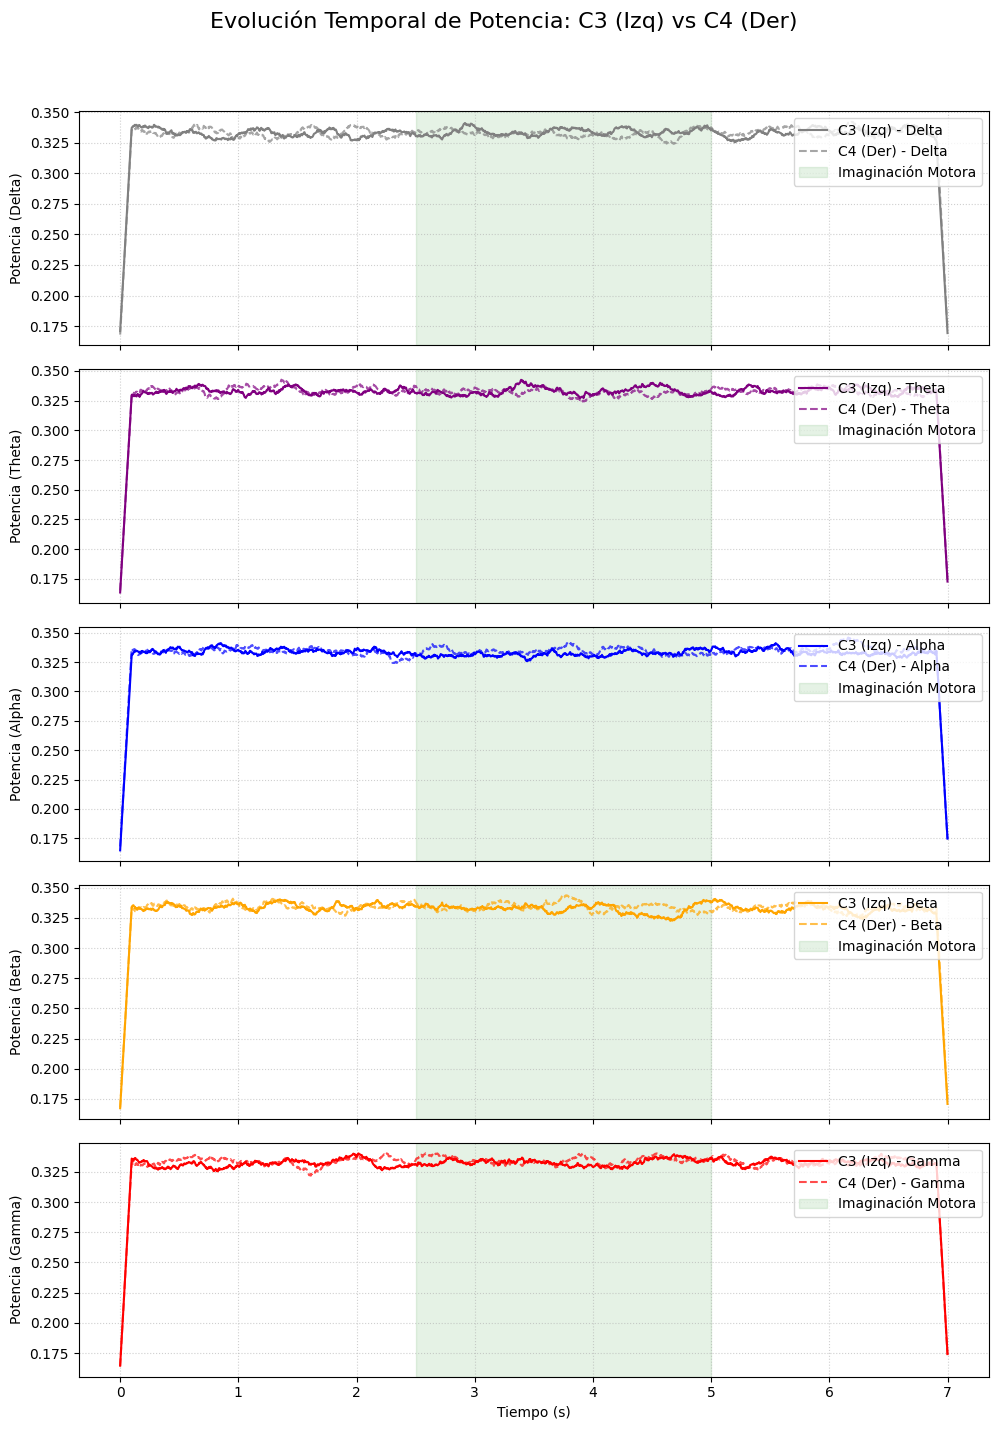

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# FIX: Define a placeholder for Xrc. You need to replace this with your actual loaded/processed data.
# Based on previous explanations, Xrc should have dimensions (trials, channels, time samples, frequency bands)
# e.g., (199, 64, 1792, 5)
try:
    # Check if Xrc is already defined (e.g., from a previous cell execution)
    Xrc
except NameError:
    print("WARNING: 'Xrc' not found. Using a dummy placeholder for demonstration.")
    # Create a dummy Xrc with the expected shape and some random data
    # Replace these dimensions with your actual data's dimensions if they differ.
    num_trials = 199
    num_channels = 64
    num_time_samples = 1792
    num_frequency_bands = 5
    Xrc = np.random.rand(num_trials, num_channels, num_time_samples, num_frequency_bands)

# 1. Calcular la Potencia Promedio de los Trials
# Elevamos al cuadrado para obtener energía y promediamos sobre los trials (eje 0)
# Nueva forma: (64 canales, 1792 tiempo, 5 bandas)
avg_power = np.mean(np.square(Xrc), axis=0)

# Definir eje de tiempo (asumiendo 7 segundos como dijiste antes)
t = np.linspace(0, 7, 1792)

# Índices de canales (¡AJUSTA ESTOS NÚMEROS A TU CONFIGURACIÓN!)
# Ejemplo típico: C3 (Izquierda) y C4 (Derecha)
idx_c3 = 9   # Ejemplo
idx_c4 = 13  # Ejemplo

nombres_bandas = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
colores = ['grey', 'purple', 'blue', 'orange', 'red']

fig, axes = plt.subplots(5, 1, figsize=(10, 15), sharex=True)
fig.suptitle('Evolución Temporal de Potencia: C3 (Izq) vs C4 (Der)', fontsize=16)

for i, ax in enumerate(axes):
    # Extraer datos de la banda i
    senal_c3 = avg_power[idx_c3, :, i]
    senal_c4 = avg_power[idx_c4, :, i]

    # Suavizar visualmente (rolling mean simple) para ver mejor la tendencia
    window = 50
    senal_c3_smooth = np.convolve(senal_c3, np.ones(window)/window, mode='same')
    senal_c4_smooth = np.convolve(senal_c4, np.ones(window)/window, mode='same')

    ax.plot(t, senal_c3_smooth, label=f'C3 (Izq) - {nombres_bandas[i]}', color=colores[i], linestyle='-')
    ax.plot(t, senal_c4_smooth, label=f'C4 (Der) - {nombres_bandas[i]}', color=colores[i], linestyle='--', alpha=0.7)

    # Marcar inicio de imaginación (ejemplo en seg 2.5 a 5)
    ax.axvspan(2.5, 5, color='green', alpha=0.1, label='Imaginación Motora')

    ax.set_ylabel(f'Potencia ({nombres_bandas[i]})')
    ax.legend(loc='upper right')
    ax.grid(True, linestyle=':', alpha=0.6)

plt.xlabel('Tiempo (s)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Punto 2.2

1. Fundamentos: Filtros FIR e IIR desde la Transformada ZLa función de transferencia de un filtro digital se define como:$$H(z) = \frac{Y(z)}{X(z)} = \frac{\sum_{k=0}^{M} b_k z^{-k}}{1 + \sum_{k=1}^{N} a_k z^{-k}}$$
Filtros FIR (Finite Impulse Response):
Son filtros cuya respuesta al impulso es finita. En la ecuación anterior, los coeficientes $a_k$ son todos cero.

Ecuación Z: $H(z) = \sum_{k=0}^{M} b_k z^{-k}$

**Polos y Ceros:** Solo tienen ceros (los polos están en el origen $z=0$). Esto garantiza que siempre son estables.

Característica clave: Pueden diseñarse para tener fase lineal. Esto significa que retrasan todas las frecuencias por la misma cantidad de tiempo, preservando la forma de la onda.

**Filtros IIR (Infinite Impulse Response):** Son filtros con retroalimentación (feedback). Usan tanto coeficientes $b_k$ (entrada) como $a_k$ (salida anterior).

**Ecuación Z:** Tienen numerador y denominador.

**Polos y Ceros:** Tienen polos que determinan la estabilidad. Si un polo cae fuera del círculo unitario en el plano Z ($|z| > 1$), el filtro se vuelve inestable.

Característica clave: Son muy eficientes. Logran cortes de frecuencia abruptos con un orden de filtro bajo (menos cómputo), pero introducen distorsión de fase (no lineal).

2. **Uso en Patrones de Imaginación Motora (MI):**

En tareas de MI, el cerebro genera patrones específicos conocidos como ERD/ERS (Desincronización/Sincronización Relacionada con Eventos) en las bandas Mu (8-12 Hz) y Beta (13-30 Hz). Así es como los filtros ayudan a describirlos:

A. Patrones Espectrales (Frecuencia)El objetivo es aislar la energía en las bandas Mu y Beta donde ocurre la actividad motora.

Uso de IIR: Debido a que las aplicaciones BCI suelen ser en tiempo real, se prefieren filtros IIR (como Butterworth o Chebyshev) porque requieren menos coeficientes y cómputo para separar, por ejemplo, la banda de 8-12 Hz.

Uso de FIR: Se usan cuando el análisis es offline o se requiere una precisión espectral extrema sin alterar la fase, permitiendo ver la estructura fina del espectro de potencia.

B. **Patrones Temporales (Tiempo):**

Aquí buscamos cuándo ocurre la imaginación del movimiento. La preservación de la forma de onda es vital.

El problema de la Fase: Un filtro IIR tiene fase no lineal. Esto significa que la componente de 8 Hz puede sufrir un retardo diferente a la de 12 Hz, deformando el pico del potencial EEG o cambiándolo de lugar en el tiempo.

La solución FIR: Para estudios donde la latencia exacta del comando cerebral es crítica (ej. medir tiempos de reacción neuronal), se usan filtros FIR de fase lineal. Aunque requieren más orden computacional, aseguran que el patrón temporal (el momento exacto del ERD) no se desplace artificialmente.

C. Patrones Espaciales (Localización)La imaginación motora es contralateral: imaginar mover la mano derecha activa el hemisferio izquierdo (electrodo C3) y viceversa (electrodo C4).

Pre-procesamiento: Aunque los filtros FIR/IIR son temporales, son el paso previo obligatorio para los filtros espaciales.

El Filtro CSP (Common Spatial Patterns): Es el algoritmo estándar para MI. El CSP funciona maximizando la varianza de una clase (mano izq) mientras minimiza la otra.

Interacción: Para que el CSP encuentre el patrón espacial correcto, la señal debe haber sido filtrada previamente (con FIR o IIR) estrictamente en la banda de frecuencia de interés (8-30 Hz). Si filtras mal temporalmente (dejando pasar ruido de 50Hz o artefactos musculares), el filtro espacial no podrá separar las zonas C3 y C4 correctamente.